In [1]:
import urllib.request
import ssl
import certifi
import ML_utils

# Create SSL context using certifi certificates
ssl_context = ssl.create_default_context(cafile=certifi.where())

# URL and file path
url = 'https://download.pytorch.org/models/resnet18-f37072fd.pth'
save_path = '/Users/owenwitt/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth'

# Open the URL and write the file
with urllib.request.urlopen(url, context=ssl_context) as response, open(save_path, 'wb') as out_file:
    out_file.write(response.read())
model_type = "rnn"
model = ML_utils.get_model(model_type = model_type, num_classes = 5)
model.eval();

/Users/owenwitt/Desktop/Guided Research/Guided Research Code/First Neural Network/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/owenwitt/Desktop/Guided Research/Guided Research Code/First Neural Network/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

path2weights = "./models/weights_"+model_type+".pt"
 
model.load_state_dict(torch.load(path2weights))
model.to(device);

/var/folders/70/dw0b0j4x62ggb9p4fvx7m14c0000gn/T/ipykernel_25075/4047923592.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path2weights

In [5]:
path2vido = "./data/hmdb51_org/turn/50_FIRST_DATES_turn_h_nm_np1_fr_goo_23.avi"
frames, v_len = ML_utils.get_frames(path2vido, n_frames=16)
len(frames), v_len

(16, 48)

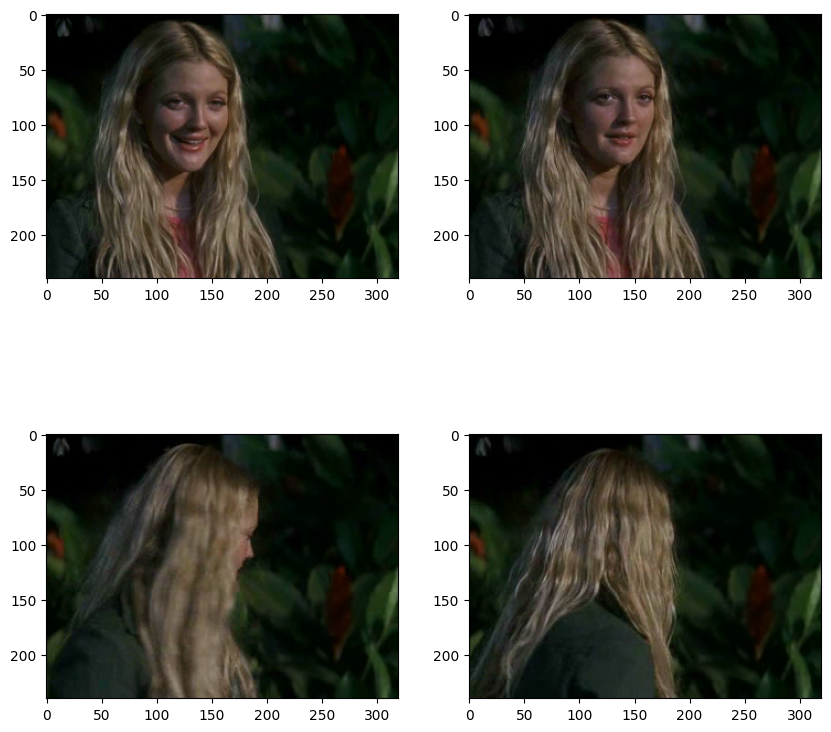

In [6]:
import matplotlib.pylab as plt

plt.figure(figsize=(10,10))
for ii,img in enumerate(frames[::4]):
    plt.subplot(2,2,ii+1)
    plt.imshow(img)

In [7]:
imgs_tensor = ML_utils.transform_frames(frames, model_type)
print(imgs_tensor.shape, torch.min(imgs_tensor), torch.max(imgs_tensor))

torch.Size([1, 16, 3, 224, 224]) tensor(-2.1179) tensor(2.5180)


In [8]:
with torch.no_grad():
    out = model(imgs_tensor.to(device)).cpu()
    print(out.shape)
    pred = torch.argmax(out).item()
    print(pred)

torch.Size([1, 5])
2
